In [1]:
import matplotlib.pyplot as plt
import cv2
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [5]:
cat4 = cv2.imread(r'C:\Users\ADITYA\Desktop\Computer-Vision-with-Python\CATS_DOGS\train\CAT\4.jpg')
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

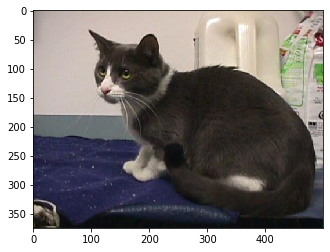

In [6]:
plt.imshow(cat4)

In [7]:
cat4.shape

(375, 500, 3)

In [8]:
dog2 = cv2.imread(r'C:\Users\ADITYA\Desktop\Computer-Vision-with-Python\CATS_DOGS\train\Dog\2.jpg')
dog2 = cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)

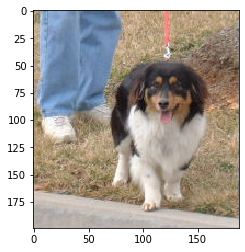

In [9]:
plt.imshow(dog2)

In [10]:
dog2.shape

(199, 188, 3)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [16]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

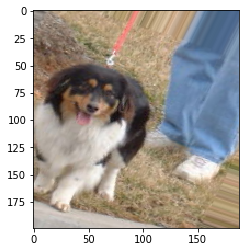

In [17]:
plt.imshow(image_gen.random_transform(dog2))

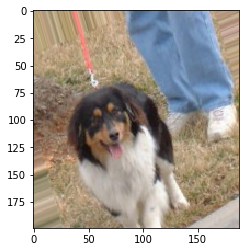

In [18]:
plt.imshow(image_gen.random_transform(dog2))

In [19]:
image_gen.flow_from_directory(r'C:\Users\ADITYA\Desktop\Computer-Vision-with-Python\CATS_DOGS\train')

Found 18743 images belonging to 2 classes.


In [20]:
image_gen.flow_from_directory(r'C:\Users\ADITYA\Desktop\Computer-Vision-with-Python\CATS_DOGS\test')

Found 6251 images belonging to 2 classes.


In [21]:
# width,height,channels
image_shape = (150,150,3)

In [22]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [23]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [31]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory(r'C:\Users\ADITYA\Desktop\Computer-Vision-with-Python\CATS_DOGS\train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [36]:
batch_size = 16

test_image_gen = image_gen.flow_from_directory(r'C:\Users\ADITYA\Desktop\Computer-Vision-with-Python\CATS_DOGS\test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [37]:
train_image_gen.class_indices



{'CAT': 0, 'DOG': 1}

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
results = model.fit_generator(train_image_gen,epochs=100,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/100
150/150 [==============================] - 53s 350ms/step - loss: 0.6901 - accuracy: 0.5454 - val_loss: 0.6854 - val_accuracy: 0.5885
Epoch 2/100
150/150 [==============================] - 54s 360ms/step - loss: 0.6783 - accuracy: 0.5645 - val_loss: 0.6936 - val_accuracy: 0.6146
Epoch 3/100
150/150 [==============================] - 53s 354ms/step - loss: 0.6854 - accuracy: 0.5567 - val_loss: 0.6404 - val_accuracy: 0.6667
Epoch 4/100
150/150 [==============================] - 53s 354ms/step - loss: 0.6785 - accuracy: 0.5825 - val_loss: 0.5908 - val_accuracy: 0.5625
Epoch 5/100
150/150 [==============================] - 52s 349ms/step - loss: 0.6696 - accuracy: 0.5942 - val_loss: 0.5865 - val_accuracy: 0.6198
Epoch 6/100
150/150 [==============================] - 53s 354ms/step - loss: 0.6640 - accuracy: 0.6017 - val_loss: 0.7717 - val_accuracy: 0.6042
Epoch 7/100
150/150 [==============================] - 53s 354ms/step - loss: 0.6617 - accuracy: 0.6100 - val_loss: 0.6668 -

In [41]:
results.history['accuracy']

[0.54541665,
 0.5645094,
 0.5566667,
 0.58246344,
 0.5941667,
 0.6016667,
 0.6100209,
 0.6045833,
 0.61544883,
 0.64458334,
 0.62666667,
 0.62375,
 0.6617954,
 0.64708334,
 0.6695833,
 0.67405856,
 0.6770833,
 0.6875,
 0.6845833,
 0.70730686,
 0.7133333,
 0.70125,
 0.715,
 0.7118998,
 0.71375,
 0.7273486,
 0.7270833,
 0.72776616,
 0.72083336,
 0.73791665,
 0.73277664,
 0.72583336,
 0.7240083,
 0.7441667,
 0.74237996,
 0.7441667,
 0.75,
 0.74530274,
 0.74541664,
 0.74697286,
 0.7604167,
 0.76375,
 0.75916666,
 0.75615865,
 0.77416664,
 0.76617956,
 0.76458335,
 0.78121084,
 0.7683333,
 0.7825,
 0.7782881,
 0.7816667,
 0.79125,
 0.79373693,
 0.7895833,
 0.7949896,
 0.79583335,
 0.80375,
 0.78956157,
 0.80791664,
 0.8025052,
 0.80041665,
 0.80041665,
 0.80875,
 0.81458336,
 0.81628394,
 0.80375,
 0.8209205,
 0.81625,
 0.81375,
 0.81375,
 0.82,
 0.8150313,
 0.82881004,
 0.81875,
 0.8095833,
 0.8237996,
 0.82375,
 0.8254167,
 0.8154489,
 0.8229167,
 0.8204167,
 0.8308977,
 0.83208334,
 0.83

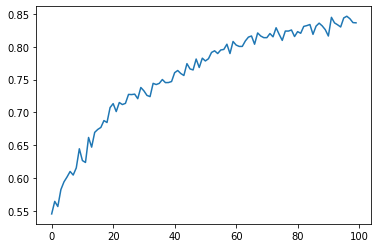

In [42]:
plt.plot(results.history['accuracy'])

In [43]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [51]:
import numpy as np
from keras.preprocessing import image

dog_file = (r'C:\Users\ADITYA\Desktop\Computer-Vision-with-Python\CATS_DOGS\test\Dog\9390.jpg')#test

dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [52]:
prediction_prob = model.predict(dog_img)

In [53]:
# Output prediction
print(f'Probability that image is a dog is: {prediction_prob} ')

Probability that image is a dog is: [[0.997421]] 
